# **1. DATASET & LIBRARIES**

## table : pokemon

Check here : https://docs.google.com/spreadsheets/d/1bY5r_wxZwxzWdIfFGyGEVhxLAryEXl0C/edit?usp=sharing&ouid=106388925887876498460&rtpof=true&sd=true)



In [ ]:
# Importing Libraries
import pandas as pd
import re
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Link google sheets CSV
url = "https://docs.google.com/spreadsheets/d/1bY5r_wxZwxzWdIfFGyGEVhxLAryEXl0C/export?format=csv"

df = pd.read_csv(url)
print(df)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp_Atk  Sp_Def  Speed  Generation 

In [ ]:
df.shape

(800, 13)

In [ ]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp_Atk      800 non-null    int64 
 9   Sp_Def      800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


There are exactly **386 rows** of null data in the **Type 2 column**



In [ ]:
df.describe()

,#,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# **2. DATA CLEANING**

## **2.1 Remove Irrelevant Column**

In [ ]:
# Delete the irrelevant column namely the first column "#"
df = df.drop(df.columns[0], axis=1)

df.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


We finally know that our data has 12 columns :
* *Name*       : Nominal data
* *Type 1*     : Nominal data
* *Type 2*     : Nominal data
* *Total*     : Ratio data
* *HP*        : Ratio data
* *Attack*     : Ratio data
* *Defense*    : Ratio data
* *Sp_Atk*     : Ratio data
* *Sp_Def*     : Ratio data
* *Speed*      : Ratio data
* *Generation* : Ordinal data
* *Legendary*  : Nominal data

## **2.2 Check Typo Value**

In [ ]:
# Column "Name"
print("Typos in column 'Name':")
for value in df['Name']:
    if re.search(r'[^\w\s]', value):
        print(value)

Typos in column 'Name':
Nidoranâ™€
Nidoranâ™‚
Farfetch'd
Mr. Mime
Ho-oh
Mime Jr.
Porygon-Z
FlabÃ©bÃ©
Zygarde50% Forme


From the results above, there are **3 typo values** with punctuation marks & corrected :

1. Nidoranâ™€ --> Nidoran
2. Nidoranâ™‚ --> Nidoran
3. FlabÃ©bÃ© --> Flabebe




In [ ]:
# Column "Type 1"
print("Typos in column 'Type 1':")
for value in df['Type 1']:
    if re.search(r'[^\w\s]', value):
        print(value)

Typos in column 'Type 1':


In [ ]:
# Column "Type 2"
print("Typos in column 'Type 2':")
for value in df['Type 2']:
    if isinstance(value, str) and re.search(r'[^\w\s]', value):
        print(value)

Typos in column 'Type 2':


In [ ]:
# Rename typo values in the "Name" column
df['Name'] = df['Name'].replace({
    'FlabÃ©bÃ©': 'Flabebe',
    'Nidoranâ™€‚ Nidoranâ™,': 'Nidoran',
    'Zygarde50% Forme': 'Zygarde'
})

print(df)

                      Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0                Bulbasaur    Grass  Poison    318  45      49       49   
1                  Ivysaur    Grass  Poison    405  60      62       63   
2                 Venusaur    Grass  Poison    525  80      82       83   
3    VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4               Charmander     Fire     NaN    309  39      52       43   
..                     ...      ...     ...    ...  ..     ...      ...   
795                Diancie     Rock   Fairy    600  50     100      150   
796    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799              Volcanion     Fire   Water    600  80     110      120   

     Sp_Atk  Sp_Def  Speed  Generation  Legendary  
0        65      65     45           1      Fal

In [ ]:
# Check the result butremains unchanged on lines 34 and 37
print(df.iloc[34:38])

          Name  Type 1  Type 2  Total  HP  Attack  Defense  Sp_Atk  Sp_Def  \
34  Nidoranâ™€  Poison     NaN    275  55      47       52      40      40   
35    Nidorina  Poison     NaN    365  70      62       67      55      55   
36   Nidoqueen  Poison  Ground    505  90      92       87      75      85   
37  Nidoranâ™‚  Poison     NaN    273  46      57       40      40      40   

    Speed  Generation  Legendary  
34     41           1      False  
35     56           1      False  
36     76           1      False  
37     50           1      False  


**Nidoranâ™€ and Nidoranâ™‚** results remain & do not change

In [ ]:
# Gets the first 7 characters of the value in rows 34 and 37 in the "Name" column
df.loc[[34, 37], 'Name'] = df.loc[[34, 37], 'Name'].str.slice(0, 7)

print(df)

                      Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0                Bulbasaur    Grass  Poison    318  45      49       49   
1                  Ivysaur    Grass  Poison    405  60      62       63   
2                 Venusaur    Grass  Poison    525  80      82       83   
3    VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4               Charmander     Fire     NaN    309  39      52       43   
..                     ...      ...     ...    ...  ..     ...      ...   
795                Diancie     Rock   Fairy    600  50     100      150   
796    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799              Volcanion     Fire   Water    600  80     110      120   

     Sp_Atk  Sp_Def  Speed  Generation  Legendary  
0        65      65     45           1      Fal

In [ ]:
# Re-check the result
print(df.iloc[34:38])

         Name  Type 1  Type 2  Total  HP  Attack  Defense  Sp_Atk  Sp_Def  \
34    Nidoran  Poison     NaN    275  55      47       52      40      40   
35   Nidorina  Poison     NaN    365  70      62       67      55      55   
36  Nidoqueen  Poison  Ground    505  90      92       87      75      85   
37    Nidoran  Poison     NaN    273  46      57       40      40      40   

    Speed  Generation  Legendary  
34     41           1      False  
35     56           1      False  
36     76           1      False  
37     50           1      False  


## **2.2 Check Neatness of Each Word**

In [ ]:
# Remove spaces and punctuation from each row in the "Name" column
df['Name'] = df['Name'].str.replace(r'\s+|[^\w\s]', '')

print(df)

                     Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0               Bulbasaur    Grass  Poison    318  45      49       49   
1                 Ivysaur    Grass  Poison    405  60      62       63   
2                Venusaur    Grass  Poison    525  80      82       83   
3    VenusaurMegaVenusaur    Grass  Poison    625  80     100      123   
4              Charmander     Fire     NaN    309  39      52       43   
..                    ...      ...     ...    ...  ..     ...      ...   
795               Diancie     Rock   Fairy    600  50     100      150   
796    DiancieMegaDiancie     Rock   Fairy    700  50     160      110   
797    HoopaHoopaConfined  Psychic   Ghost    600  80     110       60   
798     HoopaHoopaUnbound  Psychic    Dark    680  80     160       60   
799             Volcanion     Fire   Water    600  80     110      120   

     Sp_Atk  Sp_Def  Speed  Generation  Legendary  
0        65      65     45           1      False  
1      

<ipython-input-76-0bb254361b1b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r'\s+|[^\w\s]', '')


In [ ]:
# Separate each word with a "-" sign on words that begin with a capital letter
def replace_caps(match):
    return '-' + match.group(0).lower()

df['Name'] = df['Name'].str.replace(r'(?<!^)(?=[A-Z])', '-', regex=True)

print(df)

                       Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0                 Bulbasaur    Grass  Poison    318  45      49       49   
1                   Ivysaur    Grass  Poison    405  60      62       63   
2                  Venusaur    Grass  Poison    525  80      82       83   
3    Venusaur-Mega-Venusaur    Grass  Poison    625  80     100      123   
4                Charmander     Fire     NaN    309  39      52       43   
..                      ...      ...     ...    ...  ..     ...      ...   
795                 Diancie     Rock   Fairy    600  50     100      150   
796    Diancie-Mega-Diancie     Rock   Fairy    700  50     160      110   
797    Hoopa-Hoopa-Confined  Psychic   Ghost    600  80     110       60   
798     Hoopa-Hoopa-Unbound  Psychic    Dark    680  80     160       60   
799               Volcanion     Fire   Water    600  80     110      120   

     Sp_Atk  Sp_Def  Speed  Generation  Legendary  
0        65      65     45         

In [ ]:
df.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Venusaur-Mega-Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,Charizard-Mega-Charizard-X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,Charizard-Mega-Charizard-Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


## **2.4 Check Missing Values**

In [ ]:
# Percentage of null data of each column
round((df.isnull().sum()/ len(df)*100),2)

Name           0.00
Type 1         0.00
Type 2        48.25
Total          0.00
HP             0.00
Attack         0.00
Defense        0.00
Sp_Atk         0.00
Sp_Def         0.00
Speed          0.00
Generation     0.00
Legendary      0.00
dtype: float64

**There is 48.25% null data and missing data in column type 2**. Actions for data in this column are still used even though there are more than 40% values because these values are **only derivative/evolutionary data from data in column Type 1.**

<Axes: >

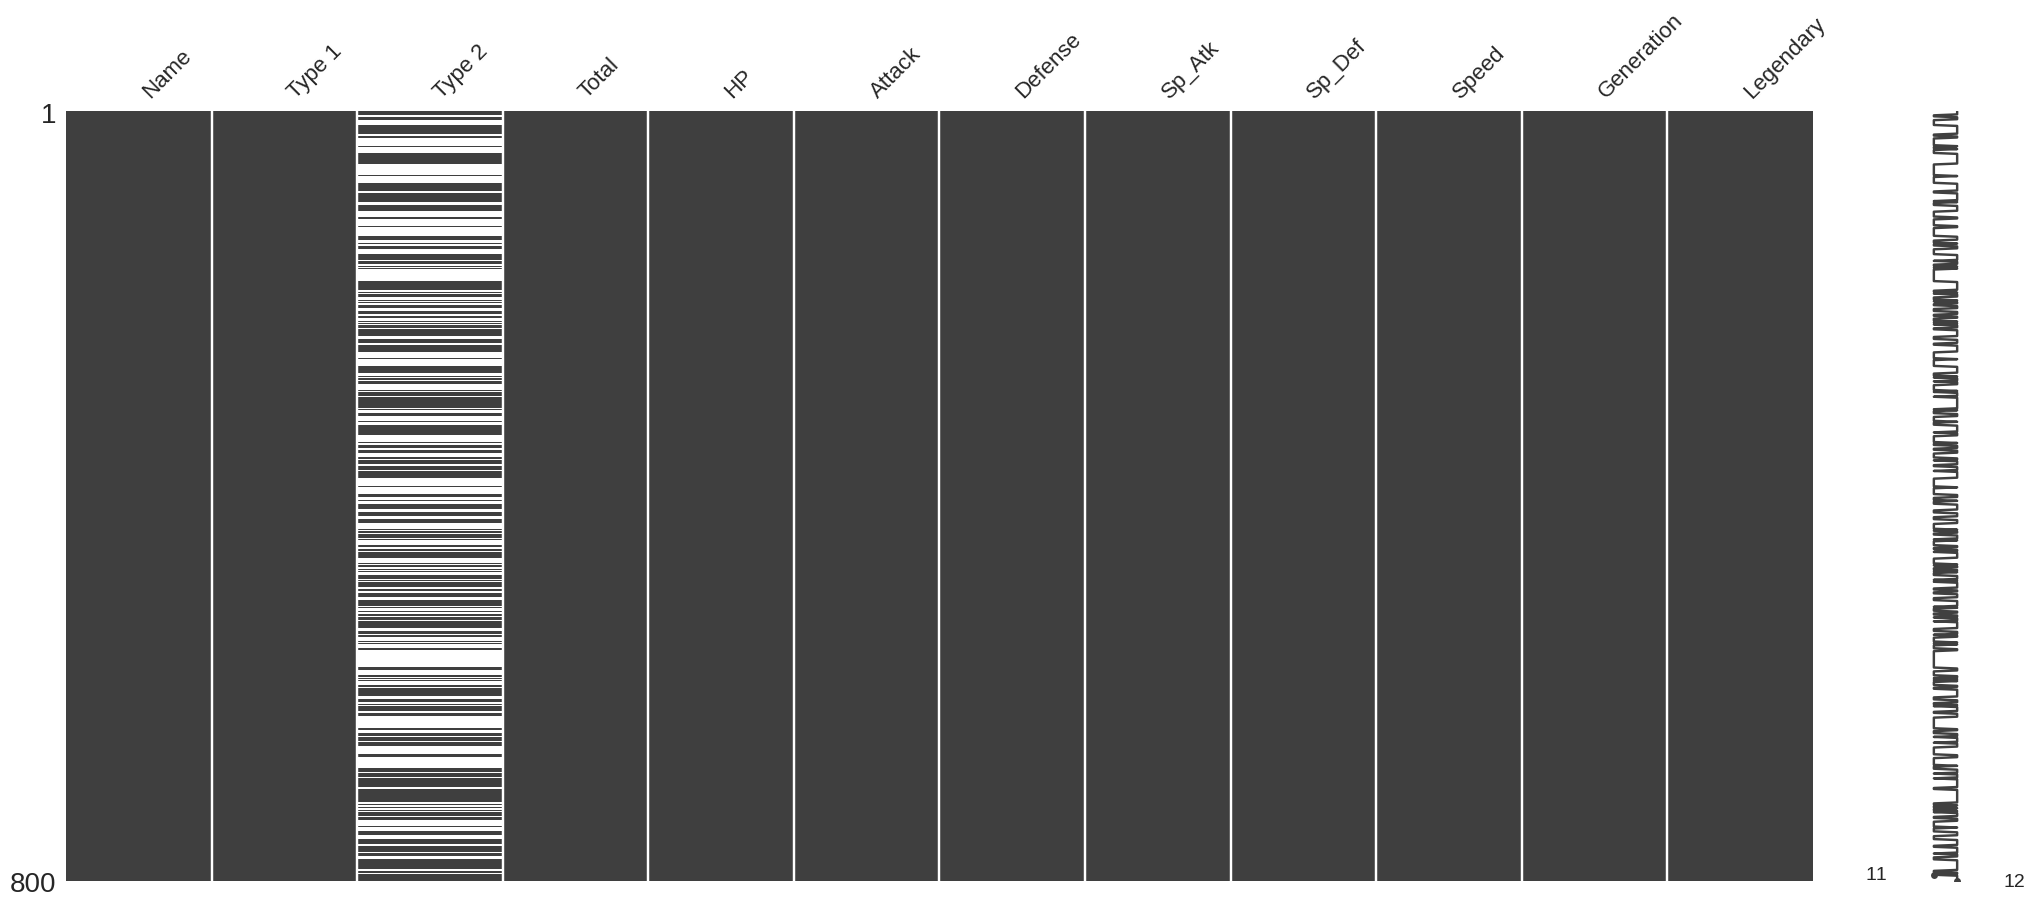

In [ ]:
# Missing data
msno.matrix(df)

## **2.5 Check Duplicate Values**

In [ ]:
# Looking for duplicated data
print('Number of duplicated data is: ', df.duplicated().sum())

Number of duplicated data is:  0


There is no duplicate data in each row and column.

## **2.6 Check Unique Values**

In [ ]:
# Check all unique types in Type 1 and Type 2
print("Type 1:",df["Type 1"].unique(), "=", len(df["Type 1"].unique()))
print("Type 2:",df["Type 2"].unique(), "=", len(df["Type 2"].unique()))

Type 1: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying'] = 18
Type 2: ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal'] = 19


There are **18 unique types in Type 1 & 2** exclude NaN. **Separate each word with a "-"** on words that begin with a capital letter

# **3. EXPLOTRATORY DATA ANALYSIS**

## **3.1 Pokemons by Type 1**

In [ ]:
# Copy dataframe to modified
df2 = df.copy()

In [ ]:
# Number of Type 1 Pokemon
number_of_pokemons = df2['Type 1'].value_counts()

print(number_of_pokemons)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


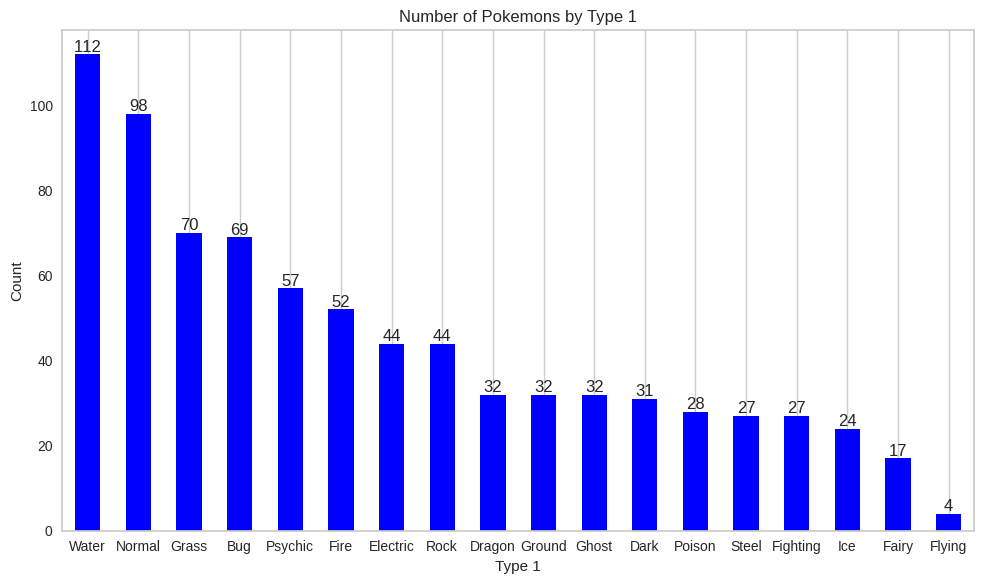

In [ ]:
# Show the bar chart
plt.figure(figsize=(10, 6))
bars = number_of_pokemons.plot(kind='bar', color='blue')
plt.title('Number of Pokemons by Type 1')
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=0)

# Data label in bar chart
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center',
                 va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

**Water** is the most common Pokemon and **Flying** is the least Pokemon.

## **3.2 Pokemons by Type 2**

In [ ]:
# Number of Type 2 Pokemon
number_of_pokemons = df2['Type 2'].value_counts()

print(number_of_pokemons)

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64


**Flying** is the most common Pokemon and **Bug** is the least Pokemon.

## **3.3 Pokemons by Generation**



In [ ]:
# Number of Generation Pokemon
number_of_pokemons = df2['Generation'].value_counts()

print(number_of_pokemons)

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


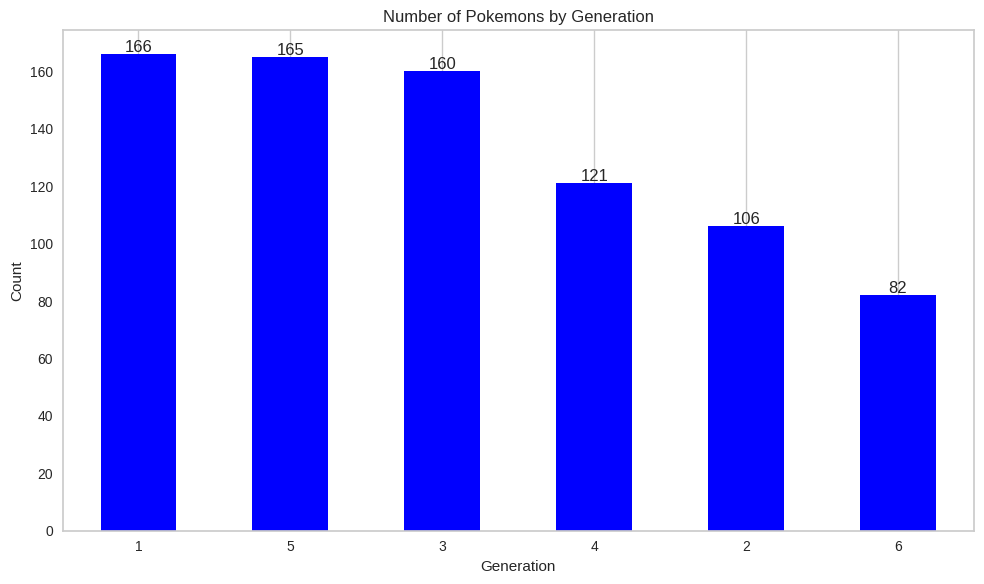

In [ ]:
# Show the bar chart
plt.figure(figsize=(10, 6))
bars = number_of_pokemons.plot(kind='bar', color='blue')
plt.title('Number of Pokemons by Generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=0)

# Data label in bar chart
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center',
                 va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

**Generation 1** is the most common Pokemon and** Generation 6** is the least Pokemon.

## **3.4 Pokemons by Legendary**



In [ ]:
# Changing "True" to "Legendary" and "False" to "Non Legendary"
df['Legendary'] = df['Legendary'].replace({True:'Legendary', False: 'Non Legendary'})

# Number of Legendary Pokemon
number_of_pokemons = df['Legendary'].value_counts()

print(number_of_pokemons)

Non Legendary    735
Legendary         65
Name: Legendary, dtype: int64


<ipython-input-90-19c0b6f9568b>:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = plt.legend(patches, labels=number_of_pokemons.index, loc='upper right')  # Get legend object


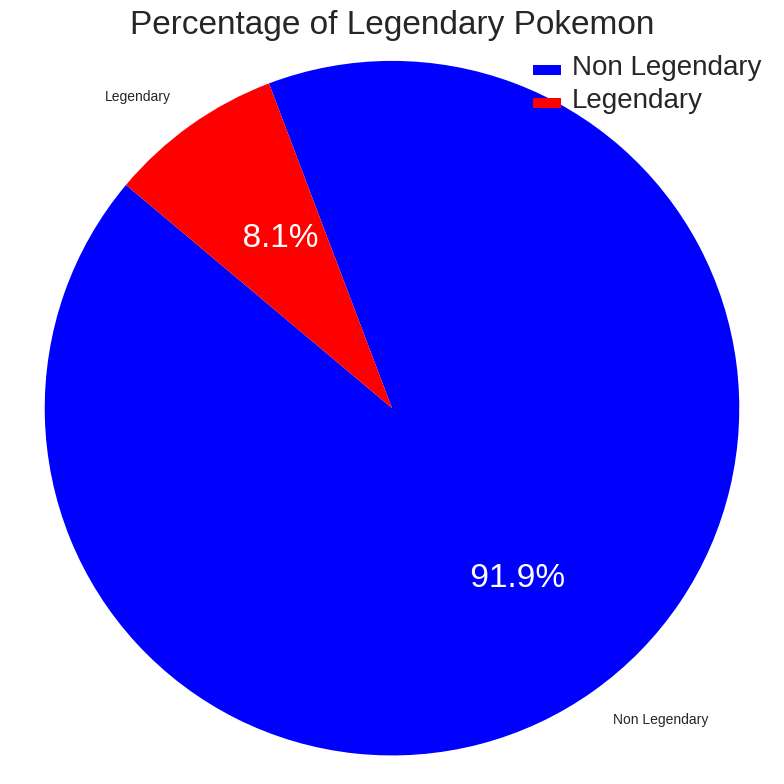

In [ ]:
# Show the pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(number_of_pokemons, autopct='%5.1f%%', colors=['blue', 'red'], labels=number_of_pokemons.index, startangle=140)
plt.title('Percentage of Legendary Pokemon', fontsize=2 * plt.rcParams['font.size'])  # Double the font size of the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
legend = plt.legend(patches, labels=number_of_pokemons.index, loc='upper right')  # Get legend object
for text in legend.get_texts():
    text.set_fontsize(2 * text.get_fontsize())  # Double the font size of legend
# Data label in pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(2 * autotext.get_fontsize())  # Double the font size of the percentage labels
plt.tight_layout()
plt.show()


There are **735 legendary (91,9%) **Pokemon out of a total of 800.

## **3.5 Pokemons by Satus Character (Total)**

In [ ]:
# Menghitung jumlah generasi Pokemon
number_of_pokemons = df2['Total'].value_counts().sort_index(ascending=False)

# Menampilkan dalam bentuk tabel dari yang tertinggi
print(number_of_pokemons)

780     3
770     2
720     1
700     9
680    13
       ..
198     1
195     3
194     1
190     1
180     1
Name: Total, Length: 200, dtype: int64


In [ ]:
# Sorts a DataFrame from highest to lowest value in the "Total" column
df2_sorted = df2.sort_values(by='Total', ascending=False)

df2_sorted.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
426,Rayquaza-Mega-Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,Mewtwo-Mega-Mewtwo-Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
163,Mewtwo-Mega-Mewtwo-X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,Kyogre-Primal-Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,Groudon-Primal-Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
552,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
712,Kyurem-White-Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,Kyurem-Black-Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
409,Salamence-Mega-Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,Metagross-Mega-Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False


**Rayquaza-Mega-Rayquaza (780)** and **Mewtwo-Mega-Mewtwo-Y (780)** is the Strongest Pokemon with the highest Status Character.

In [ ]:
# Sorts a DataFrame from lowest to highest value in the "Total" column
df2_sorted = df2.sort_values(by='Total', ascending=True)

df2_sorted.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
206,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False
322,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
446,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False
288,Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False
16,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
13,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
303,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False
732,Scatterbug,Bug,NaN,200,38,35,40,27,25,35,6,False
139,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
381,Feebas,Water,NaN,200,20,15,20,10,55,80,3,False


**Sunkern	 (180) is the Weakest Pokemon** with the Lowets Status Character.

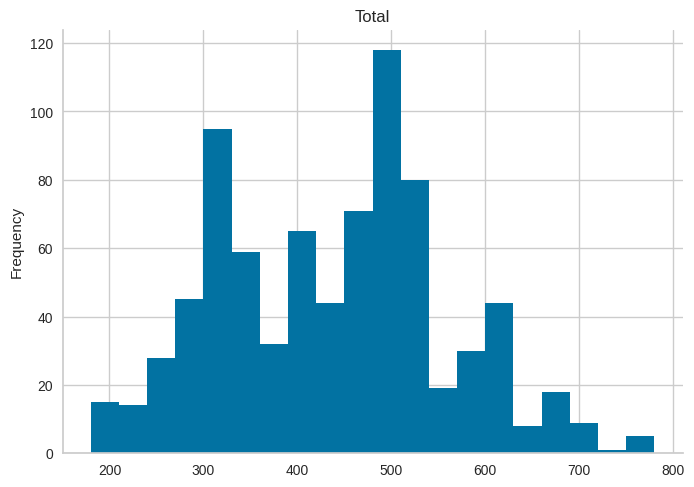

In [ ]:
df2_sorted['Total'].plot(kind='hist', bins=20, title='Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

Most Strongest Pokemon have a total score between 200-600, with peak frequency occurring **around 500 indicating most Pokemon have balanced characteristics, neither too weak nor too strong.**

## **3.6 Pokemons by Hits Point (HP)**

In [ ]:
# Sorts a DataFrame from highest to lowest value in the "HP" column
df2_sorted = df2.sort_values(by='HP', ascending=False)

df2_sorted.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
261,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
351,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
655,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False
155,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
473,Drifblim,Ghost,Flying,498,150,80,44,90,54,80,4,False
313,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
544,Giratina-Altered-Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
545,Giratina-Origin-Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True


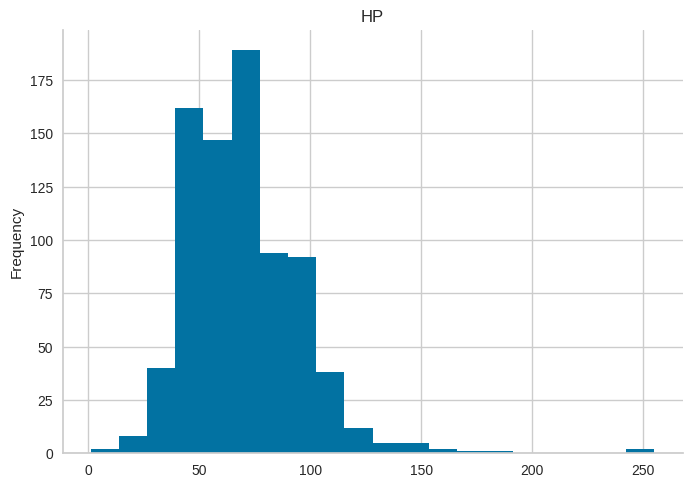

In [ ]:
df2_sorted['HP'].plot(kind='hist', bins=20, title='HP')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Blissey (255)** is the Pokemon with the highest Hits Point (HP). **Most Pokemon have HP between 50 to less than 100** but there are also a few with HP over 100, but the number drops significantly after that.

## **3.7 Pokemons by Attack**

In [ ]:
# Sorts a DataFrame from highest to lowest value in the "Attack" column
df2_sorted = df2.sort_values(by='Attack', ascending=False)

df2_sorted.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
163,Mewtwo-Mega-Mewtwo-X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,Heracross-Mega-Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,Groudon-Primal-Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,Rayquaza-Mega-Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,Deoxys-Attack-Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
711,Kyurem-Black-Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
494,Garchomp-Mega-Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
527,Gallade-Mega-Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
387,Banette-Mega-Banette,Ghost,NaN,555,64,165,75,93,83,75,3,False
454,Rampardos,Rock,NaN,495,97,165,60,65,50,58,4,False


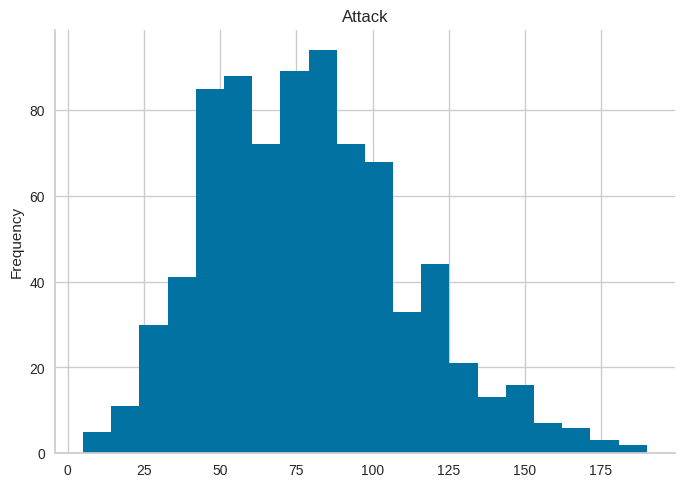

In [ ]:
df2_sorted['Attack'].plot(kind='hist', bins=20, title='Attack')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Mewtwo-Mega-Mewtwo-X (190)** is the Pokemon with the highest Attack. Most Pokemon have a competitive value **between 75 to less than 100 which is a significant frequency peak however,** the frequency drops sharply after that.

## **3.8 Pokemons by Defense**



In [ ]:
# Sorts a DataFrame from highest to lowest value in the "Defense" column
df2_sorted = df2.sort_values(by='Defense', ascending=False)

df2_sorted.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
224,Steelix-Mega-Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
333,Aggron-Mega-Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
223,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
414,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
789,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
98,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False
87,Slowbro-Mega-Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
332,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False
456,Bastiodon,Rock,Steel,495,60,52,168,47,138,30,4,False


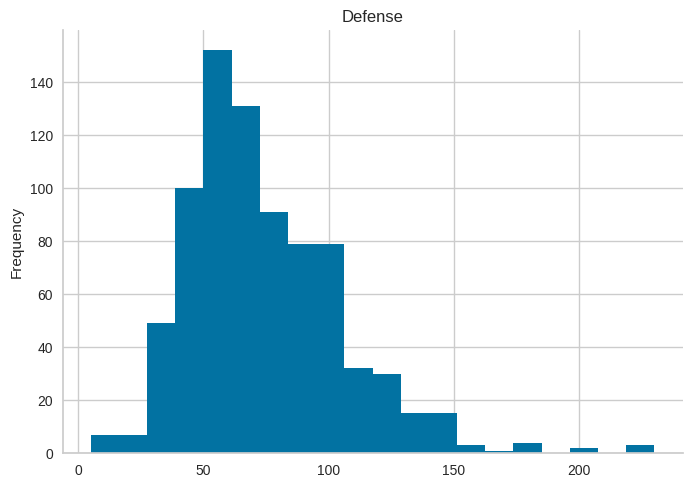

In [ ]:
df2_sorted['Defense'].plot(kind='hist', bins=20, title='Defense')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Shuckle (230)** is the Pokemon with the highest Defense. Most Pokemon with a **defense value between 70-80 have a moderate level of defense,** with a few having very high or very low defense.

## **3.9 Pokemons by Special Attack**




In [ ]:
# Sorts a DataFrame from highest to lowest value in the "Special Attack" column
df2_sorted = df2.sort_values(by='Sp_Atk', ascending=False)

df2_sorted.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
164,Mewtwo-Mega-Mewtwo-Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
422,Kyogre-Primal-Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
429,Deoxys-Attack-Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
426,Rayquaza-Mega-Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
71,Alakazam-Mega-Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
712,Kyurem-White-Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
798,Hoopa-Hoopa-Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
102,Gengar-Mega-Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
306,Gardevoir-Mega-Gardevoir,Psychic,Fairy,618,68,85,65,165,135,100,3,False
196,Ampharos-Mega-Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False


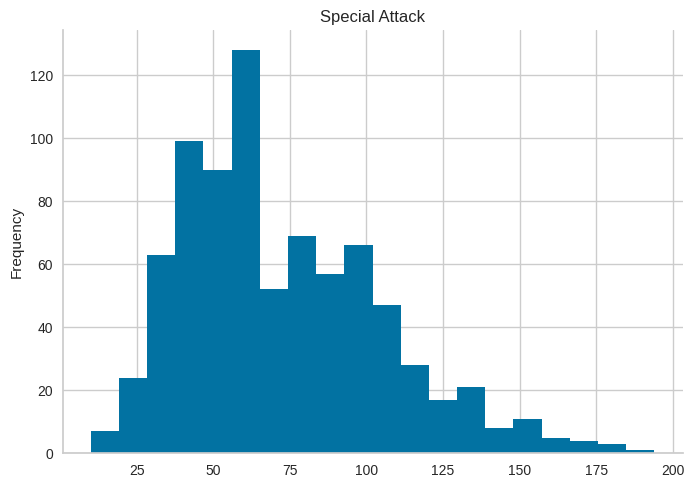

In [ ]:
df2_sorted['Sp_Atk'].plot(kind='hist', bins=20, title='Special Attack')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Mewtwo-Mega-Mewtwo-Y (194)** is the Pokemon with the highest Special Attack. The majority of Pokemon with a special attack value **between 50-60 have special attack scores that cluster around that number.**

## **3.10 Pokemons by Special Deffense**


In [ ]:
# Sorts a DataFrame from highest to lowest value in the "Special Defense" column
df2_sorted = df2.sort_values(by='Sp_Def', ascending=False)

df2_sorted.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
415,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
430,Deoxys-Defense-Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
422,Kyogre-Primal-Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
270,Hooh,Fire,Flying,680,106,130,90,110,154,90,2,True
739,Florges,Fairy,NaN,552,78,65,68,112,154,75,6,False
269,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
528,Probopass,Rock,Steel,525,60,55,145,75,150,40,4,False
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
751,Aegislash-Shield-Forme,Steel,Ghost,520,60,50,150,50,150,60,6,False


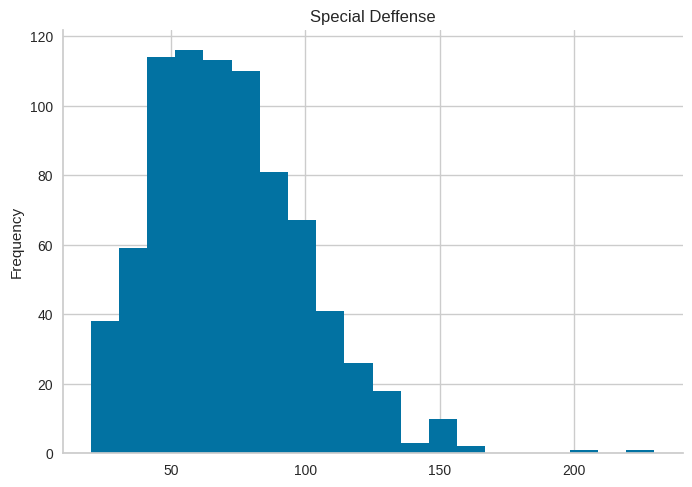

In [ ]:
df2_sorted['Sp_Def'].plot(kind='hist', bins=20, title='Special Deffense')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Shuckle (230)** is the Pokemon with the highest Special Defense. The majority have a special defense value **between 50 and 100 with a high frequency peaking at around 75,** indicating many Pokemon cluster around that number.

## **3.11 Pokemons by Speed**


In [ ]:
# Sorts a DataFrame from highest to lowest value in the "Defense" column
df2_sorted = df2.sort_values(by='Speed', ascending=False)

df2_sorted.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
431,Deoxys-Speed-Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
315,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
428,Deoxys-Normal-Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
154,Aerodactyl-Mega-Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
71,Alakazam-Mega-Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
429,Deoxys-Attack-Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
19,Beedrill-Mega-Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
275,Sceptile-Mega-Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
678,Accelgor,Bug,NaN,495,80,70,40,100,60,145,5,False
164,Mewtwo-Mega-Mewtwo-Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


**Deoxys-Speed-Forme (180)** is the Fastest Pokemon with the highest Speed.

In [ ]:
# Sorts a DataFrame from lowest to highest value in the "Defense" column
df2_sorted = df2.sort_values(by='Speed', ascending=True)

df2_sorted.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
495,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
658,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
486,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
359,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
289,Silcoon,Bug,NaN,205,50,35,55,25,25,15,3,False
651,Foongus,Grass,Poison,294,69,55,45,55,55,15,5,False
209,Wooper,Water,Ground,210,55,45,45,25,25,15,2,False
85,Slowpoke,Water,Psychic,315,90,65,65,40,40,15,1,False
187,Cleffa,Fairy,NaN,218,50,25,28,45,55,15,2,False


**Deoxys-Speed-Forme (180)** is the Slowest Pokemon with the highest Speed.

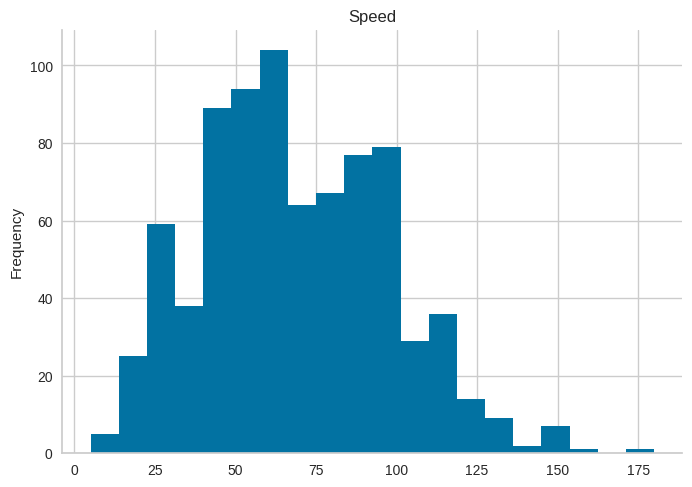

In [ ]:
df2_sorted['Speed'].plot(kind='hist', bins=20, title='Speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

**The majority of Pokemon have a speed value between 50-60.** Some Pokemon may have lower than average speed.

## **3.12 Evolution per Generation**


<ipython-input-108-097a794c927d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


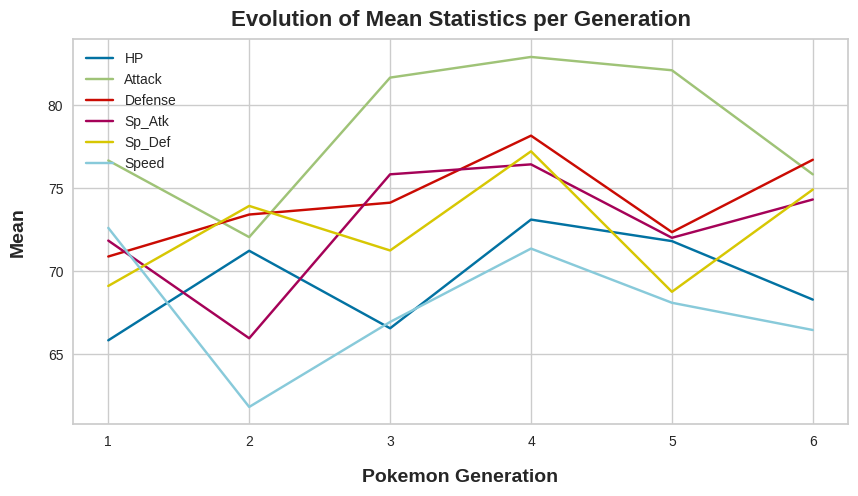

In [ ]:
# Grouping and preparing the data
df_stat = (df2.groupby('Generation')
         .mean()
         .drop(['Total', 'Legendary'], axis=1)
         .reset_index()
         .melt(id_vars=['Generation'], var_name='statistic')
         .assign(unit=0))

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x='Generation', y='value', hue='statistic', data=df_stat, ax=ax)

# Setting labels and title
ax.set_xlabel('Pokemon Generation', weight='bold', size=14, labelpad=15)
ax.set_ylabel('Mean', weight='bold', size=14, labelpad=15)
ax.set_title('Evolution of Mean Statistics per Generation', size=16, weight='bold', pad=10)

# Adjusting legend size
ax.legend(prop={'size': 10})
plt.show()

This shows that the **Generation 4** has Pokemon with superior abilities in various aspects of battle.

## **3.13 Attack VS Defense**


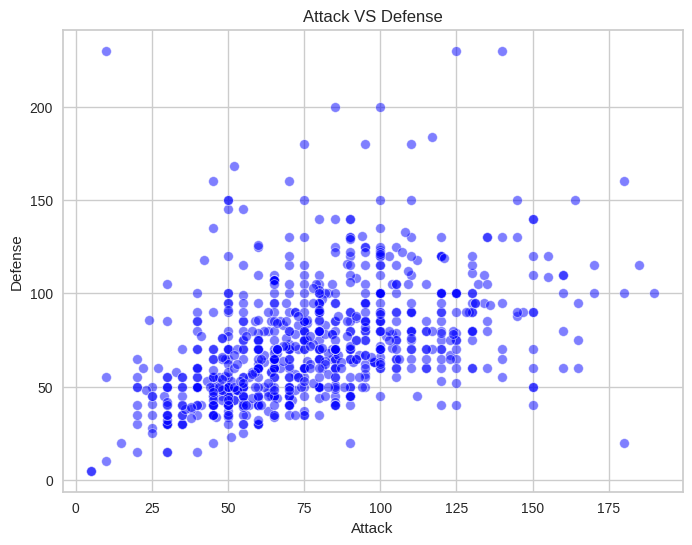

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df2, x="Attack", y="Defense", alpha=0.5, color='Blue')
plt.title('Attack VS Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.grid(True)

plt.show()

The majority of Pokemon are in the more moderate range of values. Many have attack and defense values ranging from 50 to 100 there is a concentration of data in this area.
The correlation value between these two attributes is 0.44, which shows a positive relationship. The higher the attack value, the higher the defense value, and vice versa.

## **3.14 Total VS Hits Point (HP)**


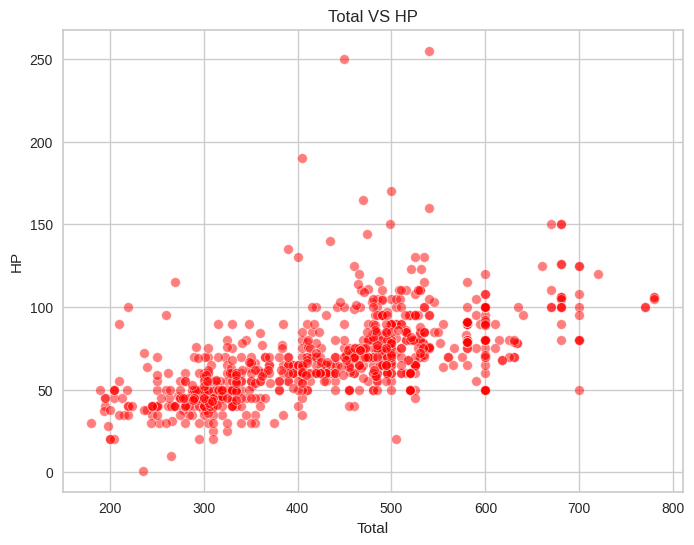

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df2, x="Total", y="HP", alpha=0.5, color='Red')
plt.title('Total VS HP')
plt.xlabel('Total')
plt.ylabel('HP')
plt.grid(True)

plt.show()

The majority of Pokemon are in the Total range of 200-600 and HP 50-150. There is less data outside this range, indicating that very high Pokemon are less common.
The positive correlation between these two attributes is that the higher the Total value, the higher the HP value, and vice versa. Many Pokemon have a balance between their total attributes and durability.

## **3.15 Correlation the Attribute**


In [ ]:
# Drop some columns that unnecessary
df_cor = df2.drop(['Name', 'Type 1', 'Type 2', 'Legendary'], axis = 1)
df_cor.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


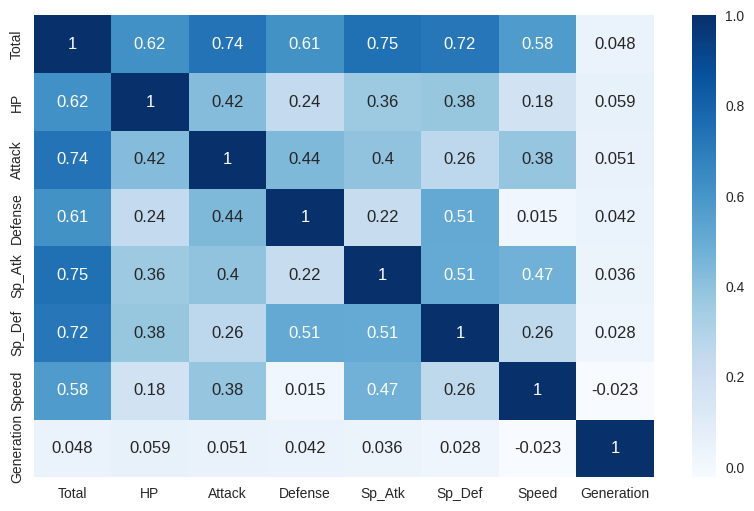

In [ ]:
# Finding any correlation
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(df_cor.corr(), annot=True, cmap='Blues')
plt.show()

This image shows the correlation between various variables several insights :

1. **Positive Correlation :** Total and HP (Hit Points) have a strong positive correlation (0.62) tend to move together where the higher the Total, the higher the HP.

2. **Negative Correlation :** Defense and Speed have a negative correlation (-0.23). The negative correlation tends to move in the opposite direction, where the higher the Defense, the lower the Speed.

3. **Uncorrelated Variables :** The variable "Generation" has a correlation that is close to zero with other variables, indicating that "Generation" does not have a significant relationship with other variables.

## **3.16 Correlation the Attribute**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

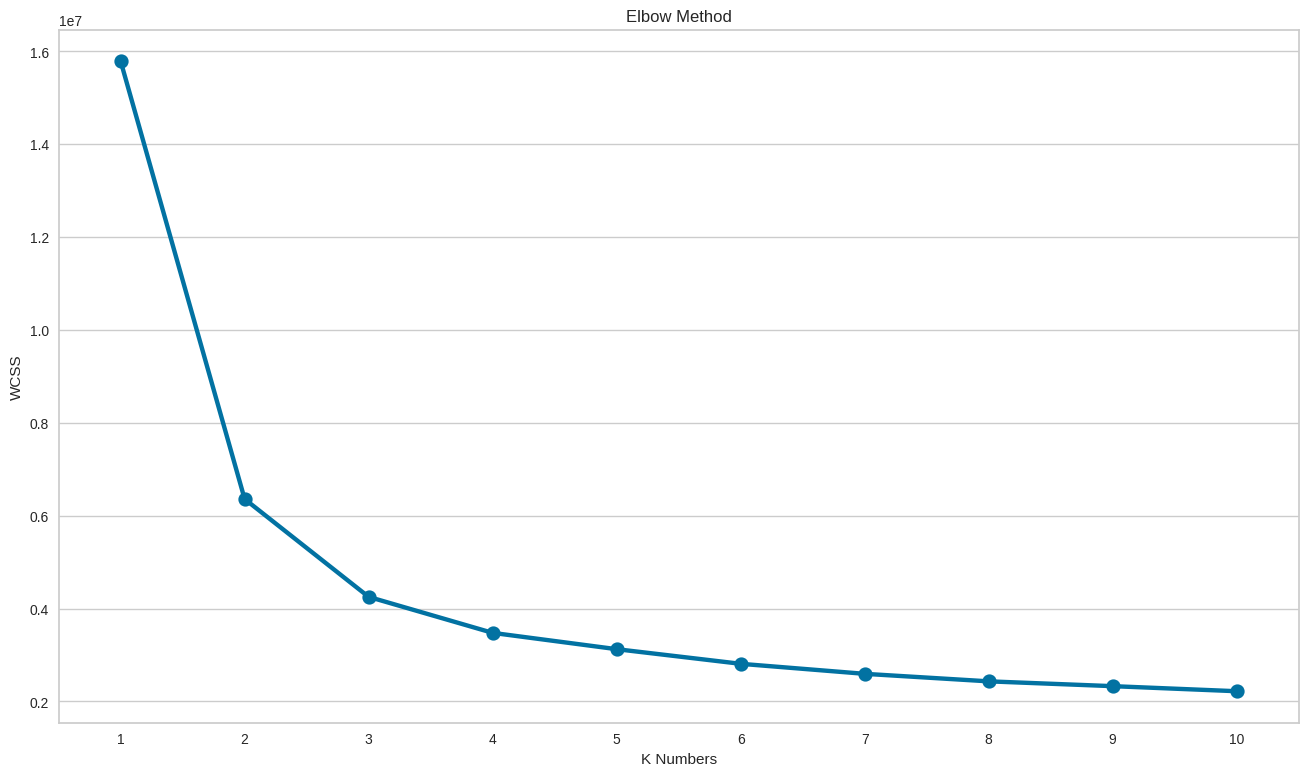

In [ ]:
#Modelling Algoritm
from sklearn.cluster import KMeans

#Elbow method
wcss = {}

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300)
    kmeans.fit(df_cor)
    wcss[i] = kmeans.inertia_

#Visualisasi Elbow Method
fig, ax = plt.subplots(figsize=(16, 9))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.title('Elbow Method')
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

Based on the graph, it appears that the recommended number of clusters is 3. At this point, the WCSS decline begins to slow, indicating that 3 clusters may be a good choice for analysis or training model.

In [ ]:
#Choose n_clusters = 3
clus = KMeans(n_clusters= 3, n_init=10, init= 'k-means++', max_iter= 300)
clus.fit(df_cor)

KMeans(n_clusters=3, n_init=10)

In [ ]:
df_cor['K_Cluster'] = clus.labels_
df_cor.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,K_Cluster
0,318,45,49,49,65,65,45,1,1
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,2
4,309,39,52,43,60,50,65,1,1


## **3.17  Silhouette Analysis**


In [ ]:
#Membuat label berdasarkan cluster
df_cor_reset = df_cor.reset_index()
count = df_cor_reset.groupby('K_Cluster')['Total'].nunique().reset_index()
count['label']=['High','Medium','Low']
count

,K_Cluster,Total,label
0,High,83,High
1,Low,27,Medium
2,Medium,90,Low


<ipython-input-139-77092dce699f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=count['Total'], x=count['label'], palette="Blues")


Text(0, 0.5, 'Count of Pokemon')

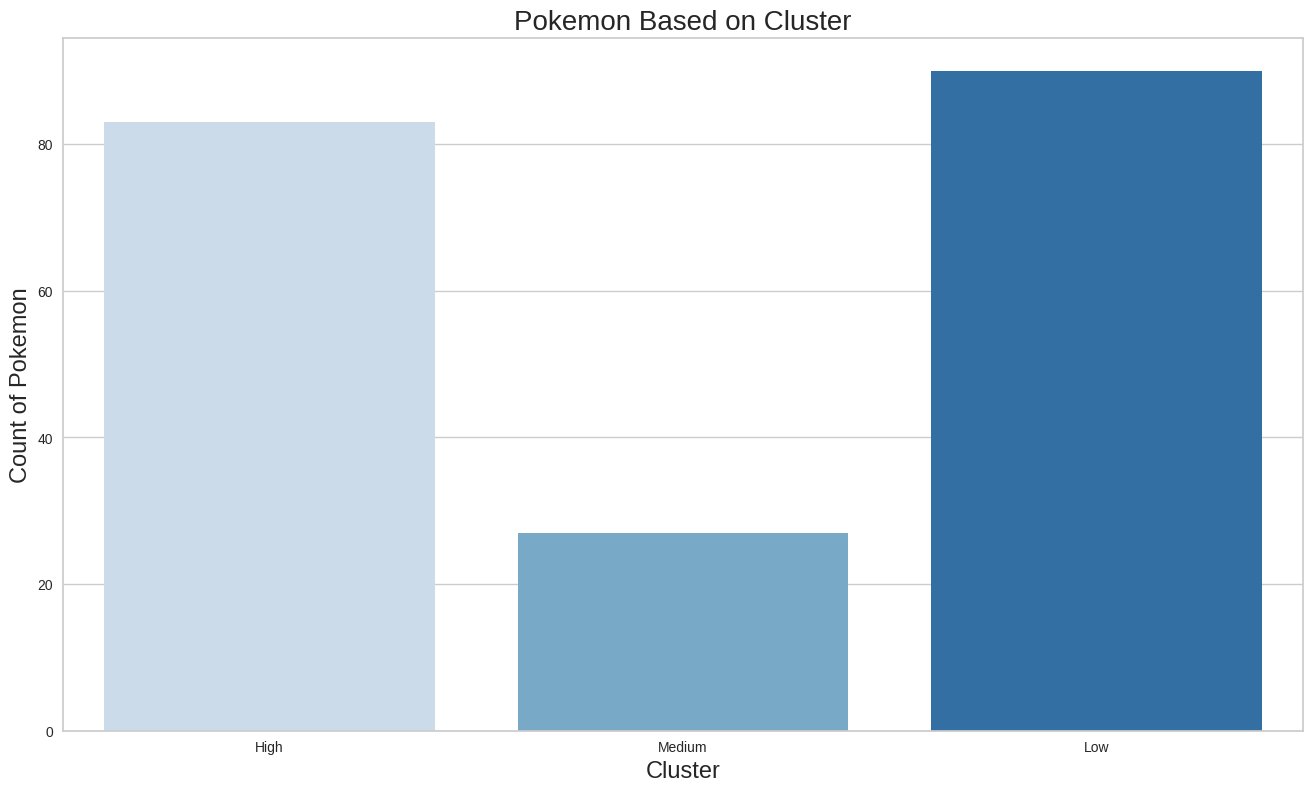

In [ ]:
#Visualisasi
fig=plt.figure(figsize=(16,9))
sns.barplot(y=count['Total'], x=count['label'], palette="Blues")
plt.title('Pokemon Based on Cluster',fontsize=20)
plt.xlabel('Cluster',fontsize=17)
plt.ylabel('Count of Pokemon',fontsize=17)

# **Documentation in SLIDE**

> Check here : https://drive.google.com/file/d/1oSvKGnC5pFlWAENx3imw7JcQvu2o9LuO/view?usp=sharing